In [146]:
#library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings



In [147]:
bdd = pd.read_csv('Subject6_smoking.csv',encoding='utf8')

In [148]:
bdd.head(5)

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

In [149]:
dff=pd.get_dummies(bdd)
dff.head(5)

Age  Smoker_No  Smoker_Yes  Status_Alive  Status_Dead
0  21.0          0           1             1            0
1  19.3          0           1             1            0
2  57.5          1           0             0            1
3  47.1          1           0             1            0
4  81.4          0           1             1            0

In [150]:
df = dff.drop(dff.columns[[1,3]], axis=1) 

In [151]:
df.head()

Age  Smoker_Yes  Status_Dead
0  21.0           1            0
1  19.3           1            0
2  57.5           0            1
3  47.1           0            0
4  81.4           1            0

In [152]:
df.columns = ['Age','Smoker','Status']
df.head()

Age  Smoker  Status
0  21.0       1       0
1  19.3       1       0
2  57.5       0       1
3  47.1       0       0
4  81.4       1       0

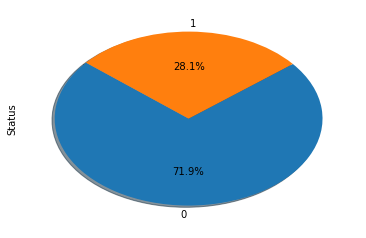

In [153]:
df['Status'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140)

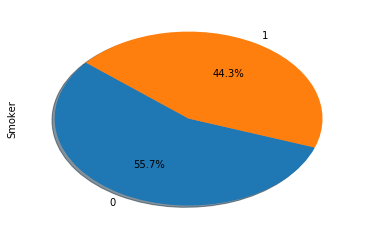

In [154]:
df['Smoker'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=140)

In [155]:
Q1=df.groupby(["Smoker"])["Status"].sum().round(0)
Q1

Smoker
0    230
1    139
Name: Status, dtype: uint8

In [156]:
df.loc[df['Age'].between(18,34), 'Classe_age'] = '18-34'
df.loc[df['Age'].between(34,54), 'Classe_age'] = '34-54'
df.loc[df['Age'].between(55,64), 'Classe_age'] = '55-64'
df.loc[df['Age']>65, 'Classe_age'] = '+ 65'

In [157]:
df.head()

Age  Smoker  Status Classe_age
0  21.0       1       0      18-34
1  19.3       1       0      18-34
2  57.5       0       1      55-64
3  47.1       0       0      34-54
4  81.4       1       0       + 65

In [158]:
Q2=df.groupby(['Classe_age','Status']).size()
Q2=Q2.unstack()

In [159]:
Q2

Status        0    1
Classe_age          
+ 65         34  207
18-34       387   11
34-54       378   60
55-64       145   91

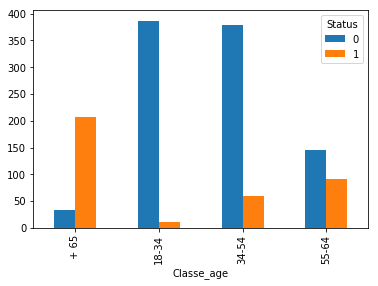

In [160]:
Q2.plot(kind="bar")

In [161]:
#la mortalite est tres elevee entre classe d'age 18-34/34-54

In [162]:
#Q3

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns

In [164]:
fc =["Smoker" , 'Age']
dffeature = df[fc]

In [165]:
dftarget =  df.loc[:, df.columns == 'Status']

In [166]:
## v1.0 split train set and test set
features, targets = dffeature, dftarget
train_features, test_features, train_targets, test_targets = train_test_split(features, targets,
                                                                              train_size=0.8,
                                                                              test_size=0.2,
                                                                              random_state=42,
                                                                              shuffle = True,
                                                                              stratify=targets
)

In [167]:
model = LogisticRegression()

In [168]:
modelf = model.fit(train_features, train_targets)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [169]:
y_pred = modelf.predict(test_features)

In [170]:
# Model Accuracy:how often is the classifier correct
print("prediction : {}".format(accuracy_score(test_targets, y_pred)*100))

# Check the model performance
print(classification_report(test_targets, y_pred))


prediction : 81.74904942965779
             precision    recall  f1-score   support

          0       0.85      0.90      0.88       189
          1       0.71      0.59      0.65        74

avg / total       0.81      0.82      0.81       263



In [171]:
confusion_matrix = confusion_matrix(test_targets,y_pred)

In [172]:
confusion_matrix

array([[171,  18],
       [ 30,  44]])

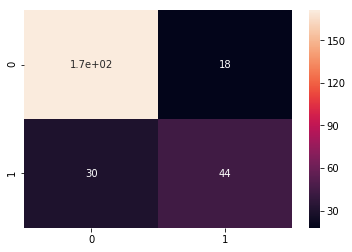

<Figure size 216x216 with 0 Axes>

In [173]:
sns.heatmap(confusion_matrix, annot = True)
plt.figure(figsize=(3,3))
plt.show()